In [1]:
# Cell 1 — Install / upgrade packages (run once)
# NOTE: You already installed many packages; running this is usually safe but you can skip parts if already present.
!pip install --upgrade pytdc scikit-learn tqdm pandas numpy matplotlib seaborn
# If RDKit is missing on your kernel uncomment the next line (but Kaggle often has rdkit preinstalled):
# !pip install rdkit-pypi

# If PyTorch is missing, uncomment one of the following based on your kernel (Kaggle usually has torch preinstalled):
# For GPU with CUDA 11.8 (example):
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# For CPU-only:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

print("Install step finished. Please restart the kernel if you just installed heavy packages like torch/rdkit.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

Using device: cuda
Imported tdc.multi_pred.DTI


Downloading...


Loading dataset from PyTDC/TDC: BindingDB_Kd


100%|██████████| 54.4M/54.4M [00:00<00:00, 75.3MiB/s]
Loading...
Done!


Raw sizes: train=36592, val=5227, test=10455
Sampled sizes for speed: train=14000, val=1999, test=4001


,Drug_ID,Drug,Target_ID,Target,Y
0,44259.0,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,P00519,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...,410.0
1,56681935.0,CSc1nc(N)nc(-c2ccccc2C)n1,P07900,MPEETQTQDQPMEEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLR...,4500.0


,Drug_ID,Drug,Target_ID,Target,Y
0,5494449.0,Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)...,Q9UM73,MGAIGLLWLLPLLLSTAAVGSGMGTGQRAGSPAAGPPLQPREPLSY...,3100.0
1,4521392.0,NC(=O)c1ccc(-c2nc(-c3ccccn3)c(-c3ccc4c(c3)OCO4...,O60285,MEGAAAPVAGDRPDLGLGAPGSPREAVAGATAALEPRKPHGVKRHH...,10000.0


,Drug_ID,Drug,Target_ID,Target,Y
0,9933475.0,COc1cc2c(Oc3ccc4[nH]c(C)cc4c3F)ncnc2cc1OCCCN1C...,Q8IYT8,MEVVGDFEYSKRDLVGHGAFAVVFRGRHRQKTDWEVAIKSINKKNL...,10000.0
1,9929127.0,COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C,Q9H422,MASQVLVYPPYVYQTQSSAFCSVKKLKVEPSSCVFQERNYPRTYVN...,10000.0


Preprocessing train:   0%|          | 0/14000 [00:00<?, ?it/s]

Preprocessing val:   0%|          | 0/1999 [00:00<?, ?it/s]

Preprocessing test:   0%|          | 0/4001 [00:00<?, ?it/s]

Final dataset shapes:
Train: (14000, 800) (14000, 1024) (14000,)
Val:   (1999, 800) (1999, 1024) (1999,)
Test:  (4001, 800) (4001, 1024) (4001,)
AffinityCNN(
  (embed): Embedding(21, 128, padding_idx=0)
  (conv): Sequential(
    (0): Conv1d(128, 256, kernel_size=(7,), stride=(1,), padding=(3,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(256, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (4): ReLU()
    (5): AdaptiveMaxPool1d(output_size=1)
  )
  (fp_net): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (head): Sequential(
    (0): Linear(in_features=640, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=1, bias=True)
  )
)
Starting training: Combined model (Protein sequence + Drug fingerprint)
Epoch 1/20 — train_loss: 1.9604, val_loss: 1.236

,mse,rmse,mae,r2,pearson,spearman
combined,0.979133,0.989512,0.688824,0.487279,0.703330,0.669866
drug_only,1.217434,1.103374,NaN,0.362494,0.610238,NaN
prot_only,1.459702,1.208181,NaN,0.235631,0.554967,NaN
rf_baseline,0.852088,0.923086,NaN,0.553806,0.744372,NaN


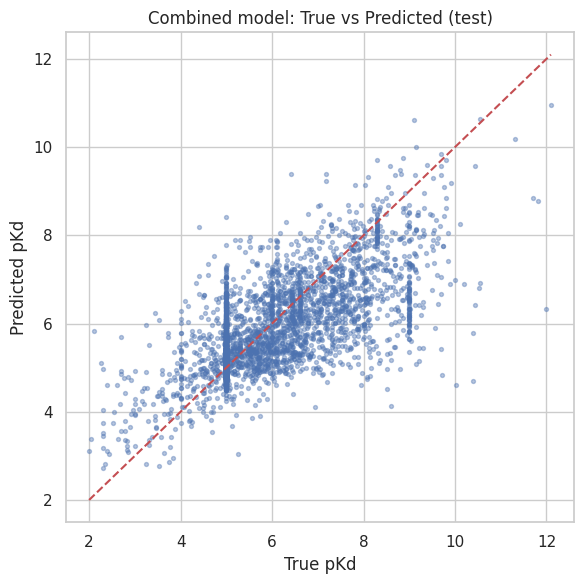

Experiment finished. Results & models saved in: results_bindingdb


In [2]:
# Cell 2 — Full experiment: data, model, training, evaluation, ablation, baseline
# Author: Adapted for quick Kaggle project; designed to be reproducible & conference-paper friendly.

# ========== 0. Imports & reproducibility ==========
import os, random, time, math
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Reproducibility
def set_seed(seed=42):
    import torch
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
set_seed(42)

# Device
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ========== 1. Robust import for TDC / PyTDC ==========
# The user installed PyTDC; try imports from common names to be robust.
try:
    # common TDC API
    from tdc.multi_pred import DTI
    print("Imported tdc.multi_pred.DTI")
except Exception:
    try:
        from pytdc.multi_pred import DTI
        print("Imported pytdc.multi_pred.DTI")
    except Exception:
        raise ImportError("Could not import tdc or pytdc. Install pytdc (pip install pytdc).")

# RDKit
from rdkit import Chem
from rdkit.Chem import AllChem

# sklearn utils
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split

# PyTorch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# ========== 2. Configurable hyperparameters ==========
CONFIG = {
    "dataset_name": "BindingDB_Kd",   # use BindingDB Kd from PyTDC/TDC
    "max_samples": 20000,             # sample size for quick run (increase if time/GPU allow)
    "seq_len": 800,                   # pad/truncate sequence length (adjustable)
    "fp_dim": 1024,                   # Morgan FP size
    "batch_size": 64,
    "epochs": 20,
    "embedding_dim": 128,
    "learning_rate": 1e-3,
    "patience": 3,                    # early stopping patience
    "seed": 42,
    "results_dir": "results_bindingdb",
}
os.makedirs(CONFIG["results_dir"], exist_ok=True)
set_seed(CONFIG["seed"])

# ========== 3. Load dataset via TDC/PyTDC ==========
print("Loading dataset from PyTDC/TDC:", CONFIG["dataset_name"])
dti = DTI(name=CONFIG["dataset_name"])
splits = dti.get_split()  # robust parsing below

# Parse splits (TDC returns different shapes: (train,val,test) or (train,test))
if isinstance(splits, dict):
    train_df = pd.DataFrame(splits.get('train', []))
    val_df   = pd.DataFrame(splits.get('valid', splits.get('val', [])))
    test_df  = pd.DataFrame(splits.get('test', []))
else:
    # tuple/list
    if len(splits) == 3:
        train_df = pd.DataFrame(splits[0])
        val_df   = pd.DataFrame(splits[1])
        test_df  = pd.DataFrame(splits[2])
    elif len(splits) == 2:
        train_df = pd.DataFrame(splits[0])
        val_df = pd.DataFrame([])  # no split
        test_df  = pd.DataFrame(splits[1])
    else:
        raise RuntimeError("Unexpected get_split() return: inspect `splits` variable.")

# If val is empty, we'll do internal split from train
if len(val_df) == 0:
    train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=CONFIG["seed"])

print(f"Raw sizes: train={len(train_df)}, val={len(val_df)}, test={len(test_df)}")

# ========== 4. Optional: sample subset for speed ==========
def sample_df(df, n):
    if n is None or len(df) <= n:
        return df
    return df.sample(n=n, random_state=CONFIG["seed"]).reset_index(drop=True)

# If dataset is huge, sample for quick experiment (you can increase to full dataset later)
n_total = CONFIG["max_samples"]
if n_total:
    # proportionally sample from train/val/test
    tot = len(train_df) + len(val_df) + len(test_df)
    if tot > n_total:
        # compute proportions
        p_train = len(train_df) / tot
        p_val = len(val_df) / tot
        p_test = len(test_df) / tot
        train_n = int(n_total * p_train)
        val_n = int(n_total * p_val)
        test_n = max(1, n_total - train_n - val_n)
        train_df = sample_df(train_df, train_n)
        val_df = sample_df(val_df, val_n)
        test_df = sample_df(test_df, test_n)
        print(f"Sampled sizes for speed: train={len(train_df)}, val={len(val_df)}, test={len(test_df)}")
    else:
        print("Dataset under sampling threshold; using full dataset.")

# TDC DTI data usually has columns: 'Drug', 'Target', 'Y' (where Y is Kd in nM for BindingDB_Kd)
for df in [train_df.head(2), val_df.head(2), test_df.head(2)]:
    display(df)

# ========== 5. Preprocessing helpers ==========
# SMILES -> Morgan fingerprint
def smiles_to_fp(smiles, n_bits=1024, radius=2):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((n_bits,), dtype=np.float32)
        arr = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=n_bits)
        fp = np.zeros((n_bits,), dtype=np.float32)
        AllChem.DataStructs.ConvertToNumpyArray(arr, fp)
        return fp
    except Exception as e:
        # on failure return zero vector
        return np.zeros((n_bits,), dtype=np.float32)

# Sequence encoding (AA -> int)
AA = 'ACDEFGHIKLMNPQRSTVWY'  # 20 standard aa
aa_to_int = {aa: i+1 for i, aa in enumerate(AA)}  # reserve 0 for pad/unknown
SEQ_LEN = CONFIG["seq_len"]

def encode_seq(seq, L=SEQ_LEN):
    idx = [aa_to_int.get(a, 0) for a in seq]
    if len(idx) < L:
        idx = idx + [0]*(L - len(idx))
    else:
        idx = idx[:L]
    return np.array(idx, dtype=np.int64)

# Convert binding label Kd (nM) to pKd (–log10(M)) as regression target
def kd_to_pkd(kd_nm):
    # some entries are lists/strings; ensure numeric
    try:
        kd_val = float(kd_nm)
        if kd_val <= 0:
            return np.nan
        return -np.log10(kd_val * 1e-9)
    except Exception:
        return np.nan

# ========== 6. Build feature matrices with caching ==========
cache_dir = Path("preprocessed_cache")
cache_dir.mkdir(exist_ok=True)

def preprocess_df(df, name):
    cache_file = cache_dir / f"{name}_preprocessed.npz"
    if cache_file.exists():
        arr = np.load(cache_file)
        return arr["seqs"], arr["fps"], arr["y"]
    seqs = []
    fps = []
    y = []
    for i, row in tqdm(df.iterrows(), total=len(df), desc=f"Preprocessing {name}"):
        smiles = row.get('Drug') or row.get('SMILES') or row.get('SMILES_drug') or row.get('drug')
        seq = row.get('Target') or row.get('protein_sequence') or row.get('target')
        label = row.get('Y') if 'Y' in row.index else row.get('Affinity') or row.get('Label') or row.get('Kd')
        if pd.isna(smiles) or pd.isna(seq) or pd.isna(label):
            continue
        seqs.append(encode_seq(seq))
        fps.append(smiles_to_fp(smiles, n_bits=CONFIG["fp_dim"]))
        y_val = kd_to_pkd(label)
        if math.isnan(y_val):
            continue
        y.append(y_val)
    seqs = np.stack(seqs) if len(seqs)>0 else np.zeros((0,SEQ_LEN), dtype=np.int64)
    fps = np.stack(fps) if len(fps)>0 else np.zeros((0, CONFIG["fp_dim"]), dtype=np.float32)
    y = np.array(y, dtype=np.float32)
    np.savez_compressed(cache_file, seqs=seqs, fps=fps, y=y)
    return seqs, fps, y

X_train_seq, X_train_fp, y_train = preprocess_df(train_df, "train")
X_val_seq, X_val_fp, y_val = preprocess_df(val_df, "val")
X_test_seq, X_test_fp, y_test = preprocess_df(test_df, "test")

print("Final dataset shapes:")
print("Train:", X_train_seq.shape, X_train_fp.shape, y_train.shape)
print("Val:  ", X_val_seq.shape, X_val_fp.shape, y_val.shape)
print("Test: ", X_test_seq.shape, X_test_fp.shape, y_test.shape)

# Quick sanity: if dataset too small, abort
if X_train_seq.shape[0] < 100:
    print("Warning: very few training samples — consider increasing max_samples or using full dataset.")

# ========== 7. PyTorch Dataset & DataLoader ==========
class DTIDataset(Dataset):
    def __init__(self, seqs, fps, ys):
        self.seqs = seqs
        self.fps = fps
        self.ys = ys
    def __len__(self):
        return len(self.ys)
    def __getitem__(self, idx):
        s = torch.tensor(self.seqs[idx], dtype=torch.long)
        f = torch.tensor(self.fps[idx], dtype=torch.float32)
        y = torch.tensor(self.ys[idx], dtype=torch.float32)
        return s, f, y

train_ds = DTIDataset(X_train_seq, X_train_fp, y_train)
val_ds = DTIDataset(X_val_seq, X_val_fp, y_val)
test_ds = DTIDataset(X_test_seq, X_test_fp, y_test)

train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=2, pin_memory=True)

# ========== 8. Model definition ==========
class AffinityCNN(nn.Module):
    def __init__(self, seq_len=SEQ_LEN, n_aa=21, embed_dim=CONFIG["embedding_dim"], fp_dim=CONFIG["fp_dim"]):
        super().__init__()
        self.embed = nn.Embedding(n_aa, embed_dim, padding_idx=0)  # embed sequence
        # conv backbone (1D)
        self.conv = nn.Sequential(
            nn.Conv1d(embed_dim, 256, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=3),
            nn.Conv1d(256, 128, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(1)  # shrink to (batch, 128, 1)
        )
        self.fp_net = nn.Sequential(
            nn.Linear(fp_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.head = nn.Sequential(
            nn.Linear(128 + 512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, seq_idx, fp):
        # seq_idx: (B, L)
        x = self.embed(seq_idx)              # (B, L, embed_dim)
        x = x.permute(0, 2, 1)               # (B, embed_dim, L) for conv1d
        x = self.conv(x)                     # (B, 128, 1)
        x = x.view(x.size(0), -1)            # (B, 128)
        d = self.fp_net(fp)                  # (B, 512)
        h = torch.cat([x, d], dim=1)         # (B, 640)
        out = self.head(h).squeeze(1)        # (B,)
        return out

# Create model instance
model = AffinityCNN().to(device)
print(model)

# ========== 9. Training utilities ==========
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for s, fp, y in loader:
        s = s.to(device); fp = fp.to(device); y = y.to(device)
        optimizer.zero_grad()
        y_pred = model(s, fp)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * s.size(0)
    return running_loss / len(loader.dataset)

def eval_model(model, loader, criterion):
    model.eval()
    preds = []
    trues = []
    running_loss = 0.0
    with torch.no_grad():
        for s, fp, y in loader:
            s = s.to(device); fp = fp.to(device); y = y.to(device)
            y_pred = model(s, fp)
            loss = criterion(y_pred, y)
            running_loss += loss.item() * s.size(0)
            preds.append(y_pred.cpu().numpy())
            trues.append(y.cpu().numpy())
    preds = np.concatenate(preds)
    trues = np.concatenate(trues)
    mse = mean_squared_error(trues, preds)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    try:
        pearson_r = pearsonr(trues, preds)[0]
    except Exception:
        pearson_r = np.corrcoef(trues, preds)[0,1]
    try:
        spearman_r = spearmanr(trues, preds)[0]
    except Exception:
        spearman_r = np.nan
    metrics = {"mse": mse, "rmse": rmse, "mae": mae, "r2": r2, "pearson": pearson_r, "spearman": spearman_r}
    return running_loss / len(loader.dataset), preds, trues, metrics

# ========== 10. Training loop with early stopping & checkpoint ==========
def run_training(model, train_loader, val_loader, lr=CONFIG["learning_rate"], epochs=CONFIG["epochs"], patience=CONFIG["patience"]):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    best_val = float('inf')
    best_epoch = 0
    history = {"train_loss": [], "val_loss": []}
    ckpt_path = Path(CONFIG["results_dir"]) / f"best_model.pt"
    for epoch in range(1, epochs+1):
        t0 = time.time()
        train_loss = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, _, _, val_metrics = eval_model(model, val_loader, criterion)
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        print(f"Epoch {epoch}/{epochs} — train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f}, val_RMSE: {math.sqrt(val_metrics['mse']):.4f}, val_R2: {val_metrics['r2']:.4f}, time: {time.time()-t0:.1f}s")
        # checkpoint
        if val_loss < best_val:
            best_val = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), ckpt_path)
            print("  Saved best model.")
        # early stopping
        if epoch - best_epoch >= patience:
            print("  Early stopping triggered.")
            break
    # load best model
    model.load_state_dict(torch.load(ckpt_path))
    return model, history

# ========== 11. Baseline function (Random Forest on concatenated features) ==========
def baseline_rf(train_fp, train_seq, y_train, test_fp, test_seq, y_test):
    # simple baseline using concatenated flattened features (mean-pooled sequence embedding)
    # We convert seq (one-hot-like integer ids) to simple residue composition counts as quick baseline
    def seq_features(seq_array):
        # seq_array: (N, L) ints
        N, L = seq_array.shape
        feats = np.zeros((N, 20), dtype=np.float32)
        aa_index = {aa:i for i,aa in enumerate(AA)}
        for i in range(N):
            s = seq_array[i]
            counts = np.zeros((20,), dtype=np.float32)
            for a in s:
                if a>0 and a<=20:
                    counts[a-1] += 1
            feats[i] = counts / np.sum(counts) if np.sum(counts)>0 else counts
        return feats
    X_train_seq_feats = seq_features(train_seq)
    X_test_seq_feats = seq_features(test_seq)
    X_train = np.concatenate([train_fp, X_train_seq_feats], axis=1)
    X_test = np.concatenate([test_fp, X_test_seq_feats], axis=1)
    rf = RandomForestRegressor(n_estimators=200, random_state=CONFIG["seed"], n_jobs=-1)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    mse = mean_squared_error(y_test, preds); rmse = math.sqrt(mse); r2 = r2_score(y_test, preds)
    try:
        pearson_r = pearsonr(y_test, preds)[0]
    except Exception:
        pearson_r = np.corrcoef(y_test, preds)[0,1]
    return {"mse": mse, "rmse": rmse, "r2": r2, "pearson": pearson_r}, preds

# ========== 12. Run main experiment: Combined model, Ablations & Baseline ==========
# Combined model
print("Starting training: Combined model (Protein sequence + Drug fingerprint)")
model_combined = AffinityCNN().to(device)
model_combined, hist_combined = run_training(model_combined, train_loader, val_loader, lr=CONFIG["learning_rate"], epochs=CONFIG["epochs"], patience=CONFIG["patience"])

# Evaluate on test set
criterion = nn.MSELoss()
_, preds_test, trues_test, metrics_combined = eval_model(model_combined, test_loader, criterion)
print("Combined test metrics:", metrics_combined)

# Drug-only ablation: remove protein branch by feeding zero sequences (or use a reduced model)
class DrugOnlyModel(nn.Module):
    def __init__(self, fp_dim=CONFIG["fp_dim"]):
        super().__init__()
        self.fp_net = nn.Sequential(nn.Linear(fp_dim, 512), nn.ReLU(), nn.Dropout(0.2))
        self.head = nn.Sequential(nn.Linear(512, 256), nn.ReLU(), nn.Dropout(0.2), nn.Linear(256,1))
    def forward(self, seq_idx, fp):
        d = self.fp_net(fp)
        out = self.head(d).squeeze(1)
        return out

print("Training Drug-only ablation model")
drug_model = DrugOnlyModel().to(device)
# create dataloaders that ignore seq
class DrugOnlyDataset(Dataset):
    def __init__(self, fps, ys):
        self.fps = fps; self.ys = ys
    def __len__(self): return len(self.ys)
    def __getitem__(self, idx):
        return torch.tensor(self.fps[idx], dtype=torch.float32), torch.tensor(self.ys[idx], dtype=torch.float32)
def train_loader_for_drug(ds_fps, batch_size):
    return DataLoader(DrugOnlyDataset(ds_fps[0], ds_fps[2]), batch_size=batch_size, shuffle=True)
# For simplicity reuse earlier arrays for train/val/test (we'll build quick dataloaders)
drug_train_loader = DataLoader(list(zip(torch.tensor(X_train_fp), torch.tensor(y_train))), batch_size=CONFIG["batch_size"], shuffle=True)
drug_val_loader = DataLoader(list(zip(torch.tensor(X_val_fp), torch.tensor(y_val))), batch_size=CONFIG["batch_size"], shuffle=False)
drug_test_loader = DataLoader(list(zip(torch.tensor(X_test_fp), torch.tensor(y_test))), batch_size=CONFIG["batch_size"], shuffle=False)

# Adjust training utils for DrugOnlyModel
def train_epoch_drug(model, loader, optimizer, criterion):
    model.train()
    run_loss = 0
    for fp, y in loader:
        fp = fp.to(device); y = y.to(device)
        optimizer.zero_grad()
        out = model(None, fp)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        run_loss += loss.item() * len(y)
    return run_loss / len(loader.dataset)

def eval_drug(model, loader, criterion):
    model.eval()
    preds = []; trues = []
    with torch.no_grad():
        for fp, y in loader:
            fp = fp.to(device); y = y.to(device)
            out = model(None, fp)
            preds.append(out.cpu().numpy()); trues.append(y.cpu().numpy())
    preds = np.concatenate(preds); trues = np.concatenate(trues)
    return preds, trues

# Train drug-only quickly
optimizer = torch.optim.Adam(drug_model.parameters(), lr=CONFIG["learning_rate"])
criterion = nn.MSELoss()
best_val = float('inf'); best_state = None; patience = 3; pcount = 0
for epoch in range(1, 10+1):
    # train
    model_loss = train_epoch_drug(drug_model, drug_train_loader, optimizer, criterion)
    # val
    preds_val, trues_val = eval_drug(drug_model, drug_val_loader, criterion)
    val_mse = mean_squared_error(trues_val, preds_val)
    print(f"[DrugOnly] Epoch {epoch}: train_loss={model_loss:.4f}, val_mse={val_mse:.4f}")
    if val_mse < best_val:
        best_val = val_mse; best_state = drug_model.state_dict(); pcount = 0
    else:
        pcount += 1
    if pcount >= patience:
        break
drug_model.load_state_dict(best_state)
# Evaluate drug-only
criterion = nn.MSELoss()
preds_drug, trues_drug = eval_drug(drug_model, drug_test_loader, criterion)
metrics_drug = {
    "mse": mean_squared_error(trues_drug, preds_drug),
    "rmse": math.sqrt(mean_squared_error(trues_drug, preds_drug)),
    "r2": r2_score(trues_drug, preds_drug),
    "pearson": pearsonr(trues_drug, preds_drug)[0]
}
print("Drug-only test metrics:", metrics_drug)

# Protein-only ablation: encode fingerprint zeros and use only sequence branch
class ProtOnlyModel(nn.Module):
    def __init__(self, seq_len=SEQ_LEN, n_aa=21, embed_dim=CONFIG["embedding_dim"]):
        super().__init__()
        self.embed = nn.Embedding(n_aa, embed_dim, padding_idx=0)
        self.conv = nn.Sequential(
            nn.Conv1d(embed_dim, 256, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.MaxPool1d(3),
            nn.Conv1d(256, 128, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(1)
        )
        self.head = nn.Sequential(nn.Linear(128, 64), nn.ReLU(), nn.Dropout(0.2), nn.Linear(64,1))
    def forward(self, seq_idx, fp):
        x = self.embed(seq_idx).permute(0,2,1)
        x = self.conv(x).view(x.size(0), -1)
        out = self.head(x).squeeze(1)
        return out

print("Training Protein-only ablation model")
prot_model = ProtOnlyModel().to(device)
# create dataloaders for protein-only
class ProtDataset(Dataset):
    def __init__(self, seqs, ys):
        self.seqs = seqs; self.ys = ys
    def __len__(self): return len(self.ys)
    def __getitem__(self, idx):
        return torch.tensor(self.seqs[idx], dtype=torch.long), torch.tensor(self.ys[idx], dtype=torch.float32)
prot_train_loader = DataLoader(ProtDataset(X_train_seq, y_train), batch_size=CONFIG["batch_size"], shuffle=True)
prot_val_loader = DataLoader(ProtDataset(X_val_seq, y_val), batch_size=CONFIG["batch_size"], shuffle=False)
prot_test_loader = DataLoader(ProtDataset(X_test_seq, y_test), batch_size=CONFIG["batch_size"], shuffle=False)

# Train prot-only
optimizer = torch.optim.Adam(prot_model.parameters(), lr=CONFIG["learning_rate"])
criterion = nn.MSELoss()
best_val = float('inf'); best_state = None; patience=3; pcount=0
for epoch in range(1, 10+1):
    # train
    prot_model.train(); run_loss=0
    for s, y in prot_train_loader:
        s = s.to(device); y = y.to(device)
        optimizer.zero_grad()
        out = prot_model(s, None)
        loss = criterion(out, y)
        loss.backward(); optimizer.step()
        run_loss += loss.item() * s.size(0)
    run_loss /= len(prot_train_loader.dataset)
    # val
    prot_model.eval(); preds=[]; trues=[]
    with torch.no_grad():
        for s, y in prot_val_loader:
            s = s.to(device); y = y.to(device)
            out = prot_model(s, None)
            preds.append(out.cpu().numpy()); trues.append(y.cpu().numpy())
    preds = np.concatenate(preds); trues = np.concatenate(trues)
    val_mse = mean_squared_error(trues, preds)
    print(f"[ProtOnly] Epoch {epoch}: train_loss={run_loss:.4f}, val_mse={val_mse:.4f}")
    if val_mse < best_val:
        best_val=val_mse; best_state = prot_model.state_dict(); pcount=0
    else:
        pcount+=1
    if pcount>=patience:
        break
prot_model.load_state_dict(best_state)
# Evaluate protein-only
prot_model.eval(); preds=[]; trues=[]
with torch.no_grad():
    for s, y in prot_test_loader:
        s = s.to(device)
        out = prot_model(s, None)
        preds.append(out.cpu().numpy()); trues.append(y.numpy())
preds = np.concatenate(preds); trues = np.concatenate(trues)
metrics_prot = {
    "mse": mean_squared_error(trues, preds),
    "rmse": math.sqrt(mean_squared_error(trues, preds)),
    "r2": r2_score(trues, preds),
    "pearson": pearsonr(trues, preds)[0]
}
print("Protein-only test metrics:", metrics_prot)

# Baseline RandomForest
print("Training RandomForest baseline (concatenated fingerprint + simple seq features)")
rf_metrics, rf_preds = baseline_rf(X_train_fp, X_train_seq, y_train, X_test_fp, X_test_seq, y_test)
print("RF baseline test metrics:", rf_metrics)

# ========== 13. Save & report results ==========
results = {
    "combined": metrics_combined,
    "drug_only": metrics_drug,
    "prot_only": metrics_prot,
    "rf_baseline": rf_metrics
}
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv(Path(CONFIG["results_dir"])/"results_summary.csv")
print("Saved results summary to", Path(CONFIG["results_dir"])/"results_summary.csv")
display(results_df)

# Save predictions for combined model
pd.DataFrame({"true": trues_test, "pred": preds_test}).to_csv(Path(CONFIG["results_dir"])/"combined_test_preds.csv", index=False)

# ========== 14. Quick visualizations ==========
plt.figure(figsize=(6,6))
plt.scatter(trues_test, preds_test, alpha=0.4, s=8)
mn = min(trues_test.min(), preds_test.min()); mx = max(trues_test.max(), preds_test.max())
plt.plot([mn,mx], [mn,mx], 'r--')
plt.xlabel("True pKd"); plt.ylabel("Predicted pKd"); plt.title("Combined model: True vs Predicted (test)")
plt.tight_layout(); plt.show()

# Training curves if available
if 'train_loss' in locals():
    plt.figure(figsize=(6,3))
    plt.plot(hist_combined['train_loss'], label='train_loss')
    plt.plot(hist_combined['val_loss'], label='val_loss')
    plt.yscale('log')
    plt.legend(); plt.title("Training history (combined)")
    plt.show()

print("Experiment finished. Results & models saved in:", CONFIG["results_dir"])
